In [54]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
weightinit = False
grayscale = False
augmentation = False
preprocess = True
lossfunc = torch.nn.MSELoss(size_average=True)

In [86]:
from network import *
import torchvision.models as models

vgg16 = models.vgg16(pretrained=True)
vgg16 = torch.nn.Sequential(*list(vgg16.features.children()))
network = DrivingNN(pretrained_model=vgg16, grayscale=grayscale, weight_init=weightinit)

print(network)

DrivingNN(
  (expander): Conv2d (1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pretrained_model): Sequential(
    (0): Conv2d (3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (10): Conv2d (128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_

In [87]:
from data_feeder import *
train_data, val_data = getDrivingData(speed=30, track=1, preprocess=preprocess, greyscale=grayscale, augmentation=augmentation)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True, num_workers=4)

Preprocessing: feature normalization
Number of examples 1298/3/64/64. Size in bytes 63799296


In [88]:
from solver import *

try:
    solver = Solver(loss_func = lossfunc)
    accuracy_history, loss_history = solver.train(network, train_loader, num_epochs=100, learning_rate=1e-3)
except KeyboardInterrupt:
#     model.save("models/segmentation_nn.model")
    pass

Cuda available
START TRAIN.
[Epoch 1/100/2.958s] TRAIN acc/loss: 0.029/0.010
[Epoch 2/100/2.788s] TRAIN acc/loss: 0.108/0.001
[Epoch 3/100/2.788s] TRAIN acc/loss: 0.163/0.001
[Epoch 4/100/2.780s] TRAIN acc/loss: 0.236/0.000
[Epoch 5/100/2.773s] TRAIN acc/loss: 0.269/0.000
[Epoch 6/100/2.788s] TRAIN acc/loss: 0.284/0.000
[Epoch 7/100/2.772s] TRAIN acc/loss: 0.316/0.000
[Epoch 8/100/2.784s] TRAIN acc/loss: 0.333/0.000
[Epoch 9/100/2.803s] TRAIN acc/loss: 0.345/0.000
[Epoch 10/100/2.788s] TRAIN acc/loss: 0.345/0.000
[Epoch 11/100/2.796s] TRAIN acc/loss: 0.388/0.000
[Epoch 12/100/2.807s] TRAIN acc/loss: 0.400/0.000
[Epoch 13/100/2.812s] TRAIN acc/loss: 0.406/0.000
[Epoch 14/100/2.800s] TRAIN acc/loss: 0.399/0.000
[Epoch 15/100/2.807s] TRAIN acc/loss: 0.427/0.000
[Epoch 16/100/2.816s] TRAIN acc/loss: 0.460/0.000
[Epoch 17/100/2.796s] TRAIN acc/loss: 0.465/0.000
[Epoch 18/100/2.813s] TRAIN acc/loss: 0.465/0.000
[Epoch 19/100/2.804s] TRAIN acc/loss: 0.476/0.000
[Epoch 20/100/2.804s] TRAIN acc

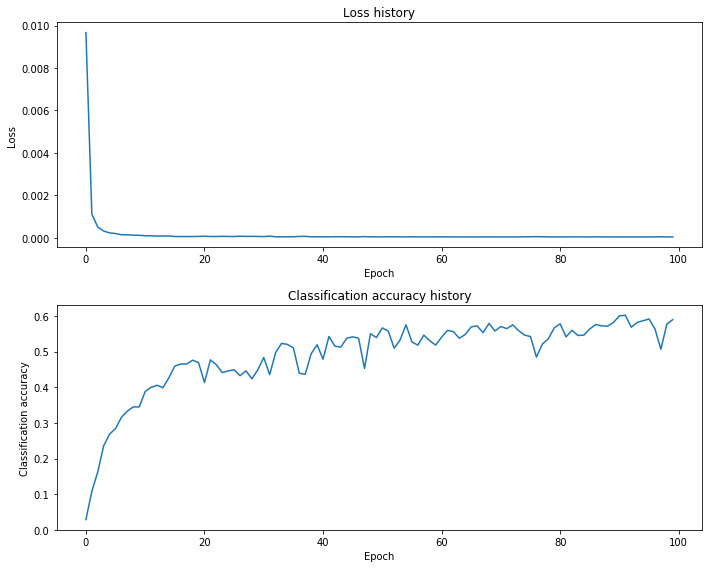

In [89]:
# Plot the loss function and train / validation accuracies
plt.subplots(nrows=2, ncols=1)

plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(accuracy_history, label='train')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.tight_layout()
plt.show()